# 损耗函数（loss function）

本节的 python 脚本将阐明回归和分类的损耗函数的区别。

加载必要的库并重置计算图。

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### 创建图会话

In [2]:
sess = tf.Session()

## 数字预测
---

我们先看数值损耗函数。为此，我们围绕目标（本例为0）创建一系列预测。

In [3]:
# 围绕 0 的 X-values
x_vals = tf.linspace(-1., 1., 500)

# 创建目标（0）
target = tf.constant(0.)

### 损耗函数

L2 Loss 是最常见的回归损耗函数。这里我们先创建它，稍后绘制出来。

In [4]:
# L2 Loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

### L1 损耗函数

使用 L1 替代损失函数是 L2。L1 与 L2 非常相似，只是我们取差值的绝对值而不是平方。

In [5]:
# L1 loss
# L = abs(pred, actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

### Pseudo-Huber 损耗函数

随着（预测 - 目标）值变大，Pseudo-Huber 损耗函数是对 L1 损耗的平滑近似。当预测值接近目标值时，Pseudo-Huber 与 L2 损失相似。

In [6]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target-x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target-x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### 绘制回归损耗函数

这里我们使用 matplotlib 绘制 L1, L2 和 Pseudo-Huber。

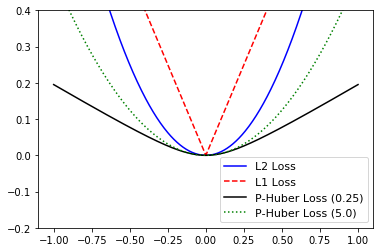

In [7]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## 分类预测
---

现在来看分类损耗函数。这里，预测值将围绕目标 1。 

In [8]:
# 预测值
x_vals = tf.linspace(-3., 5., 500)

# 目标值：1.0
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### Hinge 损耗函数

对分类预测 Hinge 损耗函数很有用。这使用 max(0, 1-(pred*actual))

In [9]:
# Hinge 损耗函数
# 用于预测二进制（-1，1）分类
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### 交叉熵损耗函数（cross entropy）

交叉熵损失是测量分类目标和输出模型对数之间的损失的非常受欢迎的方式。更多信息：https://en.wikipedia.org/wiki/Cross_entropy

In [10]:
# 交叉熵损耗
# L = -actual * (log(pred)) - (1 - actual)(log(1 - pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

### Sigmoid 熵损耗函数

tf 也有 sigmoid 熵损耗函数。下面代码和上面的交叉熵非常相似，除了使用 sigmoid 函数替换交叉熵。

In [11]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# 或者
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.softmax_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

### 权重（Softmax）交叉熵损耗函数

Tensorflow 还有一个与 `sigmoid 交叉熵` 函数相似的损耗函数，但我们将实际的 softmax 和预测的输出权重相加。

In [12]:
# 权重（Softmax）交叉熵损耗
# L = -actual * (log(pred)) * weights - (1 - actual)(log(1 - pred))
# 或者
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

### 绘制分类损耗函数

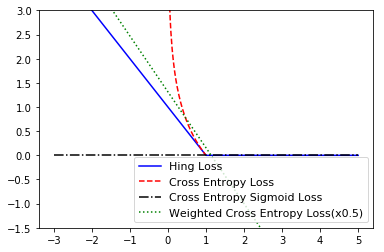

In [13]:
# 绘制输出
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hing Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss(x0.5)')
plt.ylim(-1.5, 3)
# plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

### Softmax 熵和稀疏熵（Softmax entropy and Sparse entropy）

因为很难绘制多分类损耗函数，我们将阐释如何获取输出结果

In [15]:
# Softmax 熵损耗函数
# L = -actual * (log(softmax(pred))) - (1 - actual)(log(1 - softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                          labels=target_dist)
print(sess.run(softmax_xentropy))

# 稀疏熵损耗函数
# 当分类和目标必须互斥时使用
# L = sum(-actual * log(pred))
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[ 1.16012561]
[ 0.00012564]
